# Explore data

In [1]:
import pandas as pd
from icecream import ic

In [2]:
df = pd.read_csv("b117_data_SA.csv")[1:].rename(columns={"0":"created_at", "1":"id", "2":"text", "3":"mettef", "4":"b117", "5":"wider"})
df = df.sort_values(by='created_at').reset_index(drop=True)
ic(len(df))
df.head()

ic| len(df): 3664


,created_at,id,text,mettef,b117,wider,neg,neu,pos,compound
0,2020-12-01 00:30:28,1.333569e+18,Minkskandale eller ej. Smittetryk eller mutati...,0.0,['mutation'],['mutation'],0.082,0.837,0.082,0.0000
1,2020-12-01 05:02:39,1.333638e+18,Tirsdagens Sikre engelske valg på BN… https://...,0.0,[],['engelsk'],0.000,0.872,0.128,0.4588
2,2020-12-01 06:09:47,1.333655e+18,"@JohanHedegaardJ @Danskeuni Men Johan, alterna...",0.0,[],['engelsk'],0.084,0.807,0.109,0.0000
3,2020-12-01 06:41:40,1.333663e+18,For fem år siden DF foreslog skat på brug af e...,0.0,[],['engelsk'],0.063,0.914,0.022,-0.4882
4,2020-12-01 07:01:20,1.333667e+18,@bsdphk @larsaliciously @dortetoft Begge dele....,0.0,[],['engelsk'],0.000,0.749,0.251,0.5711


## Remove quote tweets

In [3]:
import re
def remove_mentions(row):
    tweet = row["text"]
    clean_tweet = re.sub(r'@(\S*)\w', '', tweet)
    # Remove URLs
    url_pattern = re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})')
    clean_tweet = re.sub(url_pattern, '', clean_tweet)
    return clean_tweet

In [4]:
df["mentioneless_text"] = df.apply(lambda row: remove_mentions(row), axis = 1)
df["text30"] = df["mentioneless_text"].str[0:30]
df["text40"] = df["mentioneless_text"].str[0:40]
df["text50"] = df["mentioneless_text"].str[0:50]

In [5]:
df["dupe30"] = df["text30"].duplicated(keep = "first")
df["dupe40"] = df["text40"].duplicated(keep = "first")
df["dupe50"] = df["text50"].duplicated(keep = "first")

In [6]:
ic(len(df[df["dupe30"] == True]))
ic(len(df[df["dupe40"] == True]))
ic(len(df[df["dupe50"] == True]))

ic| len(df[df["dupe30"] == True]): 112
ic| len(df[df["dupe40"] == True]): 105
ic| len(df[df["dupe50"] == True]): 97


97

In [7]:
df = df[df["dupe50"] == False].reset_index()

## Which combination of keywords resulted with highest counts of matches

In [8]:
# Narrow search
df.groupby(["b117"]).count().reset_index()

,b117,index,created_at,id,text,mettef,wider,neg,neu,pos,compound,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50
0,"['b117', 'britiske virus']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,"['b117', 'mutation', 'britiske virus']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,"['b117', 'mutation']",8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
3,['b117'],94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94
4,"['britisk corona', 'mutation']",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5,['britisk corona'],7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
6,['britiske virus'],5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
7,['engelsk variant'],9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
8,"['mutation', 'britiske virus']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,"['mutation', 'engelsk mutation']",6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6


In [9]:
# Wide search
df.groupby(["wider"]).count().reset_index()

,wider,index,created_at,id,text,mettef,b117,neg,neu,pos,compound,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50
0,['engelsk'],2302,2302,2302,2302,2302,2302,2301,2301,2301,2301,2302,2302,2302,2302,2302,2302,2302
1,"['mutant', 'engelsk']",4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
2,"['mutant', 'mutation', 'engelsk']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,"['mutant', 'mutation']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,['mutant'],73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73,73
5,"['mutation', 'engelsk']",60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
6,['mutation'],1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025,1025
7,[],101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101


## Check whether different keywords return meaningful Covid tweets

In [10]:
mutation = df[df["wider"] == "['mutant']"]

In [11]:
for i in mutation["text"][0:20]:
    print(i)

Efter at have brugt dit actioncard på at slippe forbi dræber mutantminkene, skal du op imod en hidtil uset ondskab: Mikrodose-Merete https://t.co/Xyhud6kFeP
Danmark for filan. At der er lidt for høje smittetal i dele af hovedstaden kan ikke sammenlignes med mutant-virus-mink i Nordjylland. Nordjylland blev lukket ned fordi man troede vi var ved at udvikle en helt ny covid-klon. 🤞for at ingen dele af DK skal lukkes ned igen .
@matratvr @MBrgger Giv det 5 år og vi har radioaktiv mutant svineinfluenza
@AskHovmand @EsbenVest Mon ikke vi bliver hjemme, tweetet var før der blev suppleret med mutant-mink-virus lignende lock down.
@hanneejensen Hmm. Yondu, kanskje? En opprinnelig Guardian of the Galaxy. Captain Marvel er ganske kul (og jeg digger Brie Larson). Og selvfølgelig Wanda, selv om jeg først og fremst ser på henne som Magnetos datter og en råkul mutant. Men nei, det er nok Deadpool (antihelt) (phase 5, go!).
Endnu en ny casting til den allerede vilde rollebesætning på den kommende 'Sp

In [12]:
engelsk = df[df["wider"] == "['engelsk']"]
for i in engelsk["text"][0:20]:
    print(i)

Tirsdagens Sikre engelske valg på BN… https://t.co/AEvheMrdKJ
@JohanHedegaardJ @Danskeuni Men Johan, alternativet er, at UFM lukker engelsksprogede uddannelser. Jeg tror @Danskeuni er helt på linje med dig i forhold til værdien af int. studerende, og ønsker en andel vej frem end at reducere antallet.
For fem år siden DF foreslog skat på brug af engelske ord i danske tekster: softice, weekend, housecoat, wc, milkshake, burger, computer, pc, internet, email, jazz, rock, blues, whist, poker, router, laptop, server, wifi, hifi, ghettoblaster. https://t.co/ZCxwOAqoIZ
@bsdphk @larsaliciously @dortetoft Begge dele. Ingen journalister født efter 1990 kan andet end engelsk, og ingen danskere gider læse om andet end USA, hvis det er fra det store udland. Se bare hvor amok dækningen af det amerikanske præsidentvalg gik. Og det var flittigt læst/set/hørt siger alle medier. Polen? bah
@traetungdame_ EMILIE!!!!!  HVORFOR skriver du halvdelen af dit tweeted på engelsk?. Are you from another planet?.


"muation" is fine but "engelsk" is mostly actually just English.

## Remove the rows where it's just ['engelsk']

In [13]:
ic(len(df))
clean_df = df[df["wider"] != "['engelsk']"]
ic(len(clean_df))

ic| len(df): 3567
ic| len(clean_df): 1265


1265

# Visualize

In [14]:
# Aggregate a frequency DF
def get_tweet_frequencies(df):
    # Add freq of hashtags by themselves in the dataset
    tweet_freq = pd.DataFrame({'nr_of_tweets' : df.groupby(['date']).size()}).reset_index()

    # Add the whole_frew to id_hashtag
    freq_hashtags = pd.merge(df, tweet_freq, how='left', on=['date'])#, 'id', 'created_at'])
    
    df0 = freq_hashtags
    return df0

In [15]:
# Create a column which is just date
clean_df["date"] = pd.to_datetime(clean_df["created_at"], utc=True).dt.strftime('%Y-%m-%d')

freq_df = get_tweet_frequencies(clean_df)
freq_df.head()

/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,created_at,id,text,mettef,b117,wider,neg,neu,pos,compound,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50,date,nr_of_tweets
0,0,2020-12-01 00:30:28,1.333569e+18,Minkskandale eller ej. Smittetryk eller mutati...,0.0,['mutation'],['mutation'],0.082,0.837,0.082,0.0000,Minkskandale eller ej. Smittetryk eller mutati...,Minkskandale eller ej. Smittet,Minkskandale eller ej. Smittetryk eller,Minkskandale eller ej. Smittetryk eller mutati...,False,False,False,2020-12-01,9
1,31,2020-12-01 16:02:29,1.333804e+18,@Westegnen Jo flere nye mutationer desto størr...,0.0,['mutation'],['mutation'],0.000,0.833,0.167,0.7519,Jo flere nye mutationer desto større risiko f...,Jo flere nye mutationer desto,Jo flere nye mutationer desto større ri,Jo flere nye mutationer desto større risiko f...,False,False,False,2020-12-01,9
2,37,2020-12-01 17:39:59,1.333828e+18,@ole_ivanoff @sorenpind Ja. Hvis man skal tro ...,0.0,['mutation'],['mutation'],0.000,1.000,0.000,0.0000,Ja. Hvis man skal tro på regerings logik så ...,Ja. Hvis man skal tro på reg,Ja. Hvis man skal tro på regerings log,Ja. Hvis man skal tro på regerings logik så ...,False,False,False,2020-12-01,9
3,44,2020-12-01 18:05:43,1.333835e+18,@marie_bjerre @dkpolparrot Måske fordi ingen h...,0.0,['mutation'],['mutation'],0.144,0.787,0.070,-0.6062,Måske fordi ingen havde interesse i at en mu...,Måske fordi ingen havde inte,Måske fordi ingen havde interesse i at,Måske fordi ingen havde interesse i at en mu...,False,False,False,2020-12-01,9
4,49,2020-12-01 18:36:21,1.333842e+18,@cdamgaard @dkpolparrot Efterfølgende fik jo s...,0.0,['mutation'],['mutation'],0.043,0.736,0.221,0.4276,"Efterfølgende fik jo så ad vide, at der slet...",Efterfølgende fik jo så ad v,"Efterfølgende fik jo så ad vide, at de","Efterfølgende fik jo så ad vide, at der slet...",False,False,False,2020-12-01,9


In [16]:
freq_df.nr_of_tweets.describe()

count    1265.000000
mean       65.662451
std        47.286821
min         1.000000
25%        26.000000
50%        58.000000
75%        83.000000
max       164.000000
Name: nr_of_tweets, dtype: float64

In [17]:
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes

In [18]:
freq_df["date"] = pd.to_datetime(freq_df["date"])


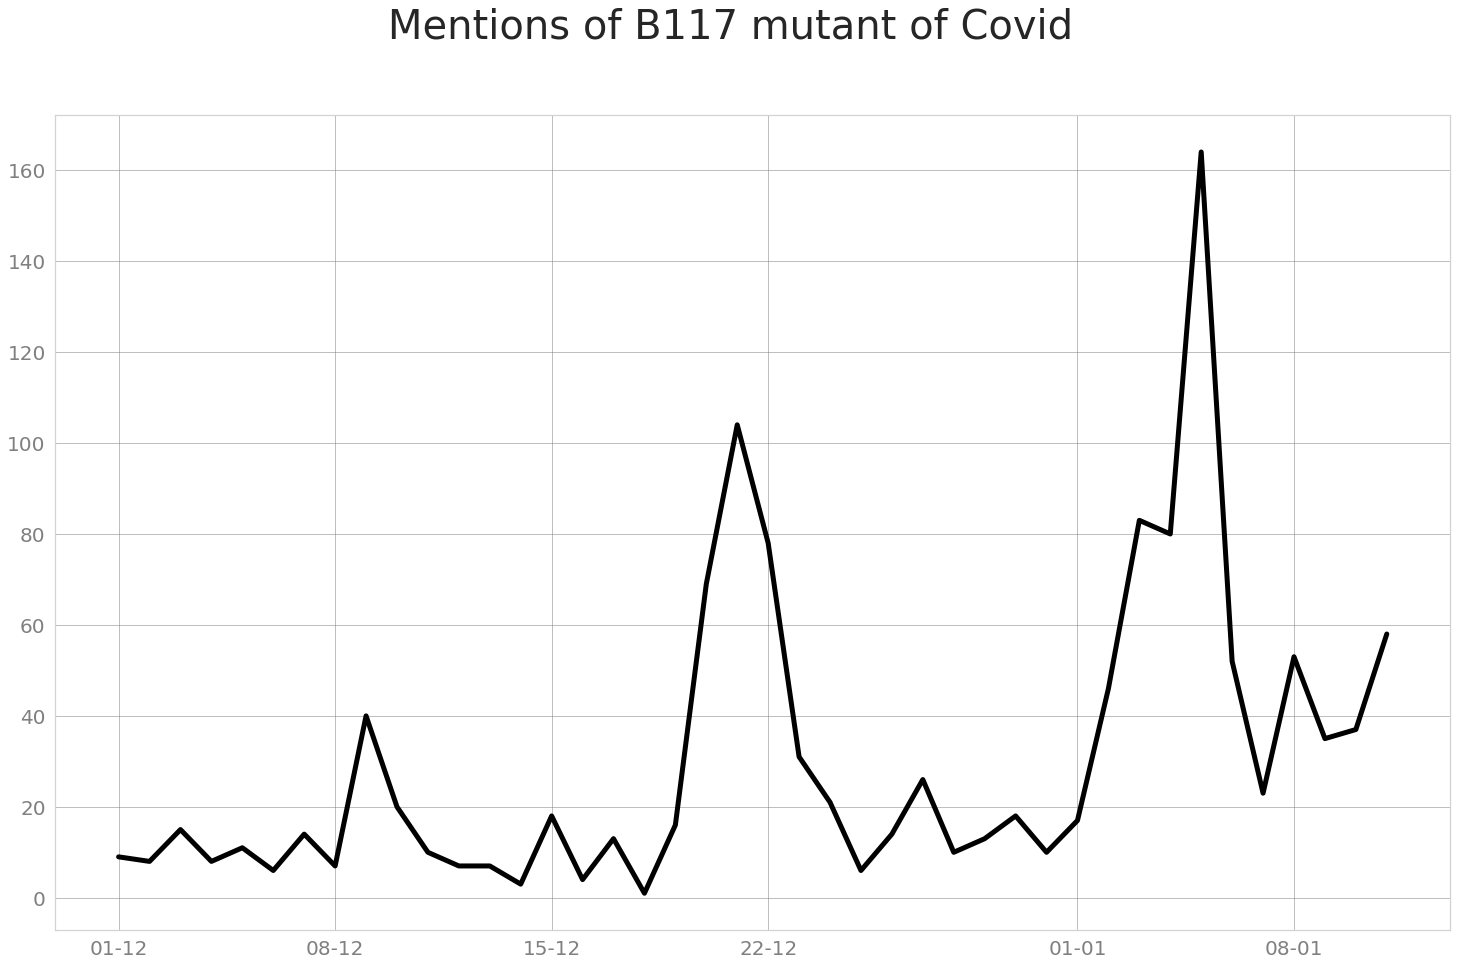

In [19]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

nr_colors = len(freq_df["date"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = sns.color_palette("inferno", nr_colors)

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.lineplot(x="date", y="nr_of_tweets", 
                  palette = palette, 
                     linewidth = 5, data = freq_df)


ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

    
fig.suptitle("Mentions of B117 mutant of Covid", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()

plot_name = "fig/all_mutations_mentions.png"
fig.savefig(plot_name)

fig.show()

In [20]:
freq_df["nr_of_tweets"].describe()

count    1265.000000
mean       65.662451
std        47.286821
min         1.000000
25%        26.000000
50%        58.000000
75%        83.000000
max       164.000000
Name: nr_of_tweets, dtype: float64

In [21]:
freq_df[freq_df["nr_of_tweets"] > 100]

,index,created_at,id,text,mettef,b117,wider,neg,neu,pos,compound,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50,date,nr_of_tweets
286,1281,2020-12-21 00:31:08,1.340817e+18,"@Heunicke Godt. Hvad med de fly, som er landet...",0.0,['mutation'],['mutation'],0.133,0.867,0.000,-0.2500,"Godt. Hvad med de fly, som er landet i dag og...","Godt. Hvad med de fly, som er","Godt. Hvad med de fly, som er landet i","Godt. Hvad med de fly, som er landet i dag og...",False,False,False,2020-12-21,104
287,1285,2020-12-21 01:23:55,1.340830e+18,Symbolpolitik når mutationen har været i Danma...,0.0,['mutation'],['mutation'],0.000,0.664,0.336,0.5508,Symbolpolitik når mutationen har været i Danma...,Symbolpolitik når mutationen h,Symbolpolitik når mutationen har været i,Symbolpolitik når mutationen har været i Danma...,False,False,False,2020-12-21,104
288,1287,2020-12-21 01:27:44,1.340831e+18,NEJENEJJJJ FOLK I REPLIES SIGER MUTATIONEN ER ...,0.0,['mutation'],['mutation'],0.154,0.846,0.000,-0.4084,NEJENEJJJJ FOLK I REPLIES SIGER MUTATIONEN ER ...,NEJENEJJJJ FOLK I REPLIES SIGE,NEJENEJJJJ FOLK I REPLIES SIGER MUTATION,NEJENEJJJJ FOLK I REPLIES SIGER MUTATIONEN ER ...,False,False,False,2020-12-21,104
289,1288,2020-12-21 01:31:05,1.340832e+18,VENT . HVIS MUTATIONEN ER FUNDET I NORDJYLLAND...,0.0,['mutation'],['mutation'],0.056,0.944,0.000,-0.1696,VENT . HVIS MUTATIONEN ER FUNDET I NORDJYLLAND...,VENT . HVIS MUTATIONEN ER FUND,VENT . HVIS MUTATIONEN ER FUNDET I NORDJ,VENT . HVIS MUTATIONEN ER FUNDET I NORDJYLLAND...,False,False,False,2020-12-21,104
290,1289,2020-12-21 01:31:11,1.340832e+18,@KT_Baek @BennyEngelbrech @Heunicke Mutationen...,0.0,['mutation'],['mutation'],0.000,1.000,0.000,0.0000,Mutationen har været kendt siden september ...,Mutationen har været kendt,Mutationen har været kendt siden sept,Mutationen har været kendt siden september ...,False,False,False,2020-12-21,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,2977,2021-01-05 23:19:05,1.346597e+18,"@ProfJLundgren Kære Jens, du siger at vi kun k...",0.0,['mutation'],['mutation'],0.061,0.826,0.113,0.3494,"Kære Jens, du siger at vi kun kan begrænse d...","Kære Jens, du siger at vi kun","Kære Jens, du siger at vi kun kan begr","Kære Jens, du siger at vi kun kan begrænse d...",False,False,False,2021-01-05,164
1003,2978,2021-01-05 23:20:48,1.346598e+18,@Ibber Jeg vil gerne sige undskyld. Det her b1...,0.0,['b117'],[],0.000,1.000,0.000,0.0000,Jeg vil gerne sige undskyld. Det her b117 og ...,Jeg vil gerne sige undskyld.,Jeg vil gerne sige undskyld. Det her b1,Jeg vil gerne sige undskyld. Det her b117 og ...,False,False,False,2021-01-05,164
1004,2979,2021-01-05 23:30:01,1.346600e+18,@SvD Mutation från DK?,0.0,['mutation'],['mutation'],0.000,0.961,0.039,0.0318,Mutation från DK?,Mutation från DK?,Mutation från DK?,Mutation från DK?,False,False,False,2021-01-05,164
1005,2980,2021-01-05 23:40:41,1.346603e+18,@christbaggs @M_B_Petersen @aroepstorff @sunem...,0.0,['b117'],[],0.258,0.697,0.045,-0.9100,Du kan ikke vaccinere nok til denne bølge...,Du kan ikke vaccinere nok,Du kan ikke vaccinere nok til denne,Du kan ikke vaccinere nok til denne bølge...,False,False,False,2021-01-05,164


## Important peaking dates

In [22]:
jan_peak = freq_df[freq_df["date"] == "2021-01-05"]
for i in jan_peak["text"]:
    print(i)
    print("\n")

Vi er nødt til at lukke samfundet mere ned pga den britiske mutation af COVID-19. Udviklingen er dybt bekymrende. SF foreslår derfor regeringen nødpasning i daginstitutionerne og at færre mødes. Vi er nødt til at stoppe smitten ellers ender vi med britiske tilstande #dkpol


@FlymerDindler @sorenkjems SF har hver gang taget politisk stilling ift de oplysninger vi har haft og jeg synes at den britiske mutation i den grad viser at man skal tage mutationer alvorligt. Ligeledes er jeg bekymret for den sydafrikanske.


@Jespermeik @wagnerleth1969 Nej heldigvis men mutationen er voldsom smitbar og er allerede i DK, så nu skal vi stoppe op


@ann_woodall9 Den har jeg med i min kalkule😉. Vi skal have vaccineret mange mange flere inden vi kan færdes frit, specielt med to mutationer på vej ind over dørtrinet


@PeterErikHansen Jeg er uenig og ja som du sikkert ved, så er SF ikke regeringen, så vi fastholder vores forslag om nødpasning i daginstitutionerne. Den britiske mutation smitter for volds

In [23]:
#print(jan_peak.reset_index()["text"][15])
#print(jan_peak.reset_index()["text"][16])
#print(jan_peak.reset_index()["text"][17])
#print(jan_peak.reset_index()["text"][18])
#print(jan_peak.reset_index()["text"][19])
#print(jan_peak.reset_index()["text"][20])
#print(jan_peak.reset_index()["text"][21])

In [24]:
dec_peak = freq_df[freq_df["date"] == "2020-12-21"]

for i in dec_peak["text"]:
    print(i)
    print("\n")

@Heunicke Godt. Hvad med de fly, som er landet i dag og i går? Hvad med de cases af mutationen, som allerede er i landet og opdaget af ssi?


Symbolpolitik når mutationen har været i Danmark siden hvert fald 14. november? https://t.co/PxKbvUQpAu #dkpol


NEJENEJJJJ FOLK I REPLIES SIGER MUTATIONEN ER FUNDET I NORDJYLLAND GODNAT ALLESAMMEN


VENT . HVIS MUTATIONEN ER FUNDET I NORDJYLLAND SKAL VI SÅ LUKKES NED IGEN ,,,,,, ,


@KT_Baek @BennyEngelbrech @Heunicke Mutationen har været kendt siden september i UK uden at flytrafik blev lukket ned. Det virker som endnu en forsinket panikreaktion (oxymoron) lige med cluster 5


@harrylftv apparently er der tilfælde af den der fucking britiske mutation her i nordjylland😭😭 tror ikk vi bliver lukket ned igen men i et sekund var jeg helt “fuck”


Jeg orker ikke at tænke på, at dette kan være en reel bombe under de vacciner, der endelig er blevet klar til brug. Og kan det ske en gang, at der dukker vaccineresistente mutationer op, så kan det ske igen

In [25]:
print("January peak:")
print(jan_peak["b117"].unique())
print(jan_peak["wider"].unique())

print("December peak:")
print(dec_peak["b117"].unique())
print(dec_peak["wider"].unique())

January peak:
["['mutation']" '[]' "['b117']" "['b117', 'mutation']"
 "['mutation', 'engelsk mutation']"
 "['b117', 'mutation', 'britiske virus']"]
["['mutation']" "['mutation', 'engelsk']" "['mutant']" '[]'
 "['mutant', 'engelsk']"]
December peak:
["['mutation']" '[]' "['britisk corona', 'mutation']"
 "['mutation', 'britiske virus']" "['b117']" "['britisk corona']"]
["['mutation']" "['mutant']" '[]' "['mutation', 'engelsk']"]


In [26]:
# January and December data
jan = freq_df[pd.to_datetime(freq_df['date']).dt.month == 1].reset_index(drop=True)
dec = freq_df[pd.to_datetime(freq_df['date']).dt.month == 12].reset_index(drop=True)

print("January   ",len(jan))
print("December  ",len(dec))

January    648
December   617


In [27]:
ic(jan.describe())
ic(dec.describe())

ic| jan.describe():              index            id  mettef         neg         neu         pos  \
                    count   648.000000  6.480000e+02   648.0  648.000000  648.000000  648.000000   
                    mean   2892.283951  1.346733e+18     0.0    0.057539    0.848304    0.094157   
                    std     415.286608  1.003423e+15     0.0    0.072873    0.104193    0.081521   
                    min    2185.000000  1.344915e+18     0.0    0.000000    0.384000    0.000000   
                    25%    2534.500000  1.346024e+18     0.0    0.000000    0.774750    0.029000   
                    50%    2856.500000  1.346474e+18     0.0    0.029000    0.856000    0.082000   
                    75%    3259.250000  1.347528e+18     0.0    0.101250    0.923000    0.141000   
                    max    3662.000000  1.348762e+18     0.0    0.370000    1.000000    0.429000   
                    
                             compound  nr_of_tweets  
                    count

,index,id,mettef,neg,neu,pos,compound,nr_of_tweets
count,617.000000,6.170000e+02,617.0,617.000000,617.000000,617.000000,617.000000,617.000000
mean,1213.348460,1.340068e+18,0.0,0.062627,0.847870,0.089514,0.033836,46.147488
std,545.947437,2.717434e+15,0.0,0.080334,0.104715,0.084761,0.463450,35.567057
min,0.000000,1.333569e+18,0.0,0.000000,0.418000,0.000000,-0.959400,1.000000
25%,763.000000,1.337849e+18,0.0,0.000000,0.783000,0.000000,-0.254100,14.000000
50%,1313.000000,1.340928e+18,0.0,0.033000,0.860000,0.071000,0.043000,31.000000
75%,1575.000000,1.341488e+18,0.0,0.106000,0.927000,0.137000,0.393100,78.000000
max,2177.000000,1.344771e+18,0.0,0.417000,1.000000,0.459000,0.966200,104.000000


In [28]:
jan.groupby(["b117"]).count().reset_index()

,b117,index,created_at,id,text,mettef,wider,neg,neu,pos,compound,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50,date,nr_of_tweets
0,"['b117', 'britiske virus']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,"['b117', 'mutation', 'britiske virus']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,"['b117', 'mutation']",8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
3,['b117'],87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87
4,"['britisk corona', 'mutation']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,['britisk corona'],2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
6,['britiske virus'],4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
7,"['mutation', 'engelsk mutation']",5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
8,['mutation'],506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506,506
9,[],33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33


In [29]:
dec.groupby(["b117"]).count().reset_index()

,b117,index,created_at,id,text,mettef,wider,neg,neu,pos,compound,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50,date,nr_of_tweets
0,['b117'],4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1,"['britisk corona', 'mutation']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,['britisk corona'],5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,"['mutation', 'britiske virus']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,"['mutation', 'engelsk mutation']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,['mutation'],563,563,563,563,563,563,563,563,563,563,563,563,563,563,563,563,563,563,563
6,[],42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42


In [30]:
jan.groupby(["wider"]).count().reset_index()

,wider,index,created_at,id,text,mettef,b117,neg,neu,pos,compound,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50,date,nr_of_tweets
0,"['mutant', 'engelsk']",4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1,"['mutant', 'mutation', 'engelsk']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,"['mutant', 'mutation']",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,['mutant'],31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
4,"['mutation', 'engelsk']",40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
5,['mutation'],479,479,479,479,479,479,479,479,479,479,479,479,479,479,479,479,479,479,479
6,[],92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92


In [31]:
dec.groupby(["wider"]).count().reset_index()

,wider,index,created_at,id,text,mettef,b117,neg,neu,pos,compound,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50,date,nr_of_tweets
0,['mutant'],42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
1,"['mutation', 'engelsk']",20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
2,['mutation'],546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546
3,[],9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9


In [32]:
len(dec)

617

# Important words used
#N501Y

# B117 mentions over time

In [33]:
def extract_b117(row):
    tweet = row["text"].lower()
    test_list = ['b117'] 
    res = [ele for ele in test_list if(ele in tweet)] 

    return res

freq_df["b117"] = freq_df.apply(lambda row: extract_b117(row), axis = 1)
freq_df["b117"] = freq_df["b117"].astype(str)
b117 = freq_df[freq_df["b117"] == "['b117']"].reset_index(drop=True)

In [34]:
freq_b117 = get_tweet_frequencies(b117)

In [35]:
freq_b117

,index,created_at,id,text,mettef,b117,wider,neg,neu,pos,...,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50,date,nr_of_tweets_x,nr_of_tweets_y
0,135,2020-12-02 21:02:48,1.334242e+18,@tronierdoodle @twhjerne Hvis du gerne vil bli...,0.0,['b117'],[],0.000,0.964,0.036,...,Hvis du gerne vil blive klogere på kønsneutr...,Hvis du gerne vil blive klog,Hvis du gerne vil blive klogere på køn,Hvis du gerne vil blive klogere på kønsneutr...,False,False,False,2020-12-02,8,1
1,1332,2020-12-21 10:06:29,1.340962e+18,"Landene rundt oss tar «action», men ikke Norge...",0.0,['b117'],[],0.029,0.906,0.065,...,"Landene rundt oss tar «action», men ikke Norge...",Landene rundt oss tar «action»,"Landene rundt oss tar «action», men ikke","Landene rundt oss tar «action», men ikke Norge...",False,False,False,2020-12-21,104,1
2,2067,2020-12-29 23:22:47,1.344061e+18,@JonasHerby Bliver der indført forbud mod at f...,0.0,['b117'],[],0.000,0.774,0.226,...,Bliver der indført forbud mod at forlade Aalb...,Bliver der indført forbud mod,Bliver der indført forbud mod at forlad,Bliver der indført forbud mod at forlade Aalb...,False,False,False,2020-12-29,13,1
3,2144,2020-12-31 08:59:52,1.344569e+18,@M_B_Petersen Ser man på den geografiske forde...,0.0,['b117'],[],0.000,0.945,0.055,...,Ser man på den geografiske fordeling i dk af ...,Ser man på den geografiske fo,Ser man på den geografiske fordeling i,Ser man på den geografiske fordeling i dk af ...,False,False,False,2020-12-31,10,1
4,2186,2021-01-01 09:02:29,1.344932e+18,@kimtiede Og hvis B117 varianten breder i DK i...,0.0,['b117'],[],0.119,0.881,0.000,...,Og hvis B117 varianten breder i DK i løbet af...,Og hvis B117 varianten breder,Og hvis B117 varianten breder i DK i lø,Og hvis B117 varianten breder i DK i løbet af...,False,False,False,2021-01-01,17,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,3642,2021-01-11 20:06:48,1.348723e+18,@katja_adolf @mvinaes @AndersTTang @SSI_dk Eni...,0.0,['b117'],[],0.000,0.956,0.044,...,Enig - men det er også mere forhaling end ...,Enig - men det er også mer,Enig - men det er også mere forhalin,Enig - men det er også mere forhaling end ...,False,False,False,2021-01-11,58,17
97,3643,2021-01-11 20:16:52,1.348726e+18,@BergqvistRene @katja_adolf @mvinaes @SSI_dk F...,0.0,['b117'],[],0.027,0.864,0.109,...,For hver dag vi formår at forsinke B117 i ...,For hver dag vi formår at,For hver dag vi formår at forsinke B,For hver dag vi formår at forsinke B117 i ...,False,False,False,2021-01-11,58,17
98,3657,2021-01-11 21:46:10,1.348748e+18,Covid #B117 går til den i Irland. https://t.co...,0.0,['b117'],[],0.000,0.893,0.107,...,Covid #B117 går til den i Irland.,Covid #B117 går til den i Irla,Covid #B117 går til den i Irland.,Covid #B117 går til den i Irland.,False,False,False,2021-01-11,58,17
99,3658,2021-01-11 21:50:16,1.348749e+18,@Westegnen @politiken Lad os lige se hvad B117...,0.0,['b117'],[],0.138,0.862,0.000,...,Lad os lige se hvad B117 har af indflydelse ...,Lad os lige se hvad B117 har,Lad os lige se hvad B117 har af indfly,Lad os lige se hvad B117 har af indflydelse ...,False,False,False,2021-01-11,58,17


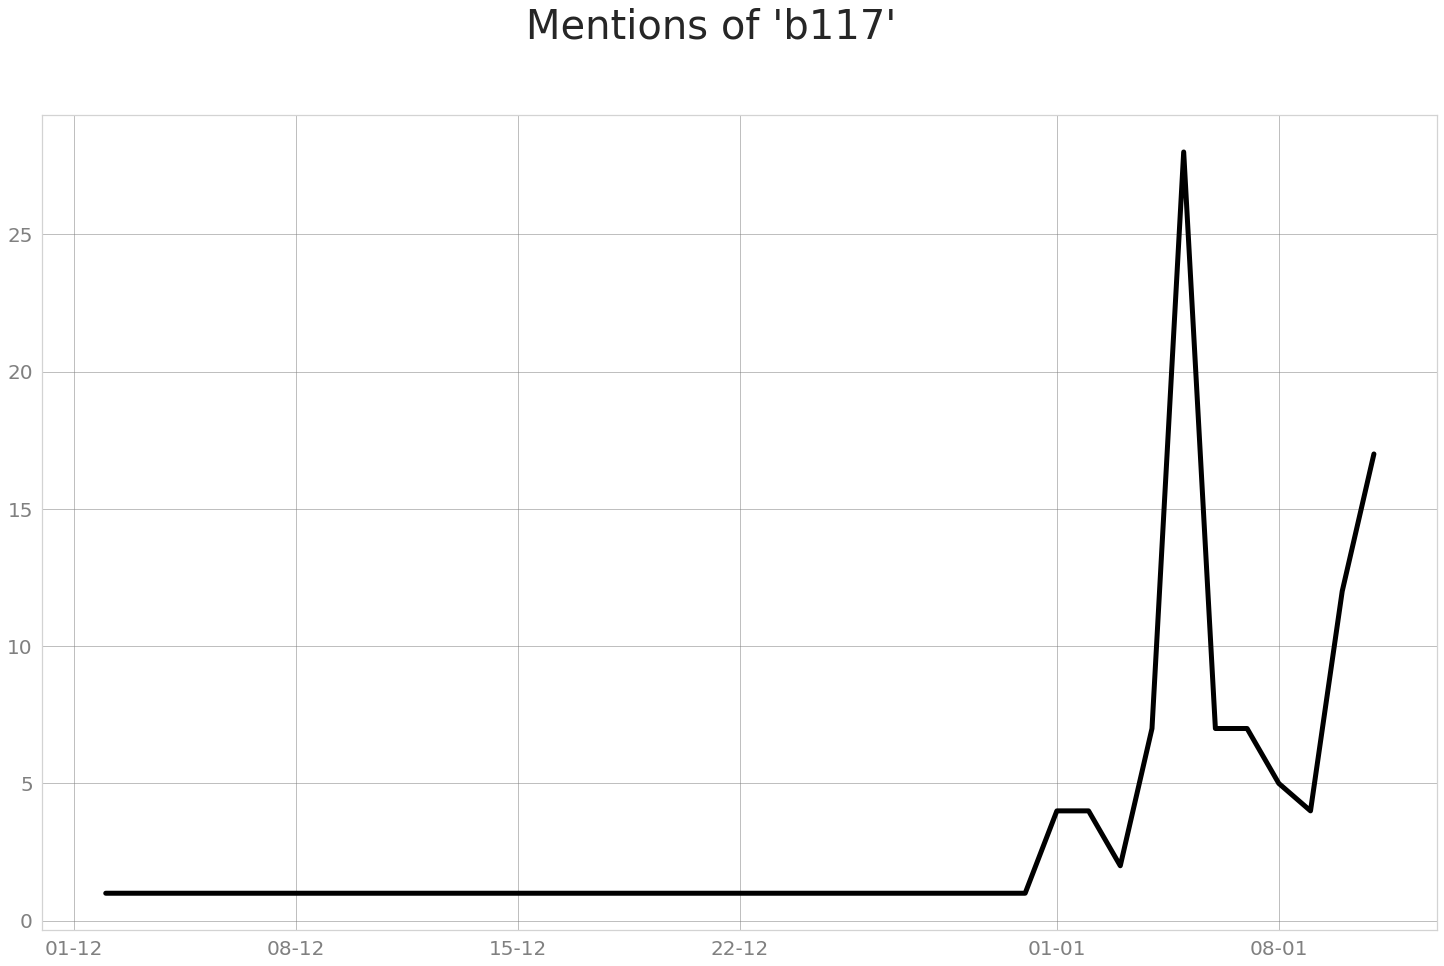

In [36]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

nr_colors = len(freq_df["date"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = sns.color_palette("inferno", nr_colors)

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.lineplot(x="date", y="nr_of_tweets_y", 
                  palette = palette, 
                     linewidth = 5, data = freq_b117)


ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

    
fig.suptitle("Mentions of 'b117' ", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()

plot_name = "fig/mentions_of_b117.png"
fig.savefig(plot_name)

fig.show()

# Hashtags used in this data

In [37]:
import re

def extract_hashtags(row):
    unique_hashtag_list = list(re.findall(r'#\S*\w', row["text"]))
    return unique_hashtag_list

def hashtag_per_row(data):
    # Create hashtags column with the actual unique hashtags
    data["hashtags"] = data.apply(lambda row: extract_hashtags(row), axis = 1)

    # Let's take a subset of necessary columns, add id
    df = data[["date", "hashtags"]].reset_index().rename(columns={"index": "id"})

    # Select only the ones where we have more than 1 hashtag per tweet
    df = df[df["hashtags"].map(len) > 1].reset_index(drop=True)

    # Hashtag per row
    # convert list of pd.Series then stack it
    df = (df
     .set_index(['date','id'])['hashtags']
     .apply(pd.Series)
     .stack()
     .reset_index()
     .drop('level_2', axis=1)
     .rename(columns={0:'hashtag'}))
    #lowercase!
    df["hashtag"] = df["hashtag"].str.lower()
    df["hashtag"] = df["hashtag"].str.replace("'.", "")
    df["hashtag"] = df["hashtag"].str.replace("’.", "")

    return df

#freq_df["hashtags"] = freq_df.apply(lambda row: extract_b117(row), axis = 1)

hashtags = hashtag_per_row(freq_df)

In [38]:
# Aggregate a frequency DF
def get_hashtag_frequencies(df):
    # Add freq of hashtags by themselves in the dataset
    tweet_freq = pd.DataFrame({'nr_of_hashtags' : df.groupby(['hashtag']).size()}).reset_index()

    # Add the whole_frew to id_hashtag
    #freq_hashtags = pd.merge(df, tweet_freq, how='left', on=['date'])#, 'id', 'created_at'])
    
    #df0 = freq_hashtags
    return tweet_freq

In [39]:
freq_hashtags = get_hashtag_frequencies(hashtags)
df = freq_hashtags.sort_values(by=['nr_of_hashtags'], ascending=False)
df

,hashtag,nr_of_hashtags
42,#dkpol,81
40,#dkmedier,40
26,#covid19dk,38
20,#covid19,17
93,#sundpol,14
...,...,...
41,#dkmink,1
39,#dkgreen,1
37,#dkcovid19,1
36,#dkaid,1


/home/commando/maris/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/commando/maris/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0, flags=flags)


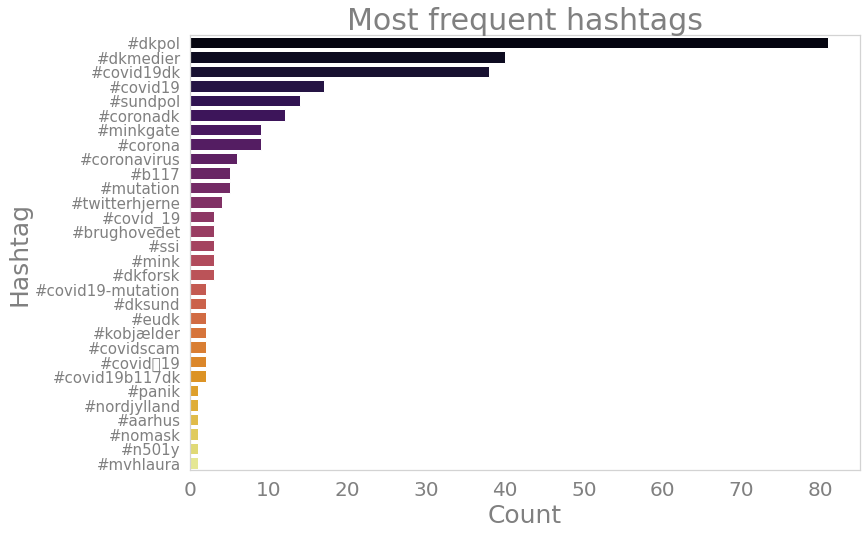

In [40]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes

df0 = df.nlargest(30, columns=['nr_of_hashtags'])
nr_hash = len(df0["hashtag"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
palette = sns.color_palette("inferno", nr_hash)

ax = sns.barplot(y="hashtag", x="nr_of_hashtags", palette = palette, data = df0)

ax.set(xlabel="Count", ylabel = "Hashtag")
ax.xaxis.get_label().set_fontsize(25)
ax.yaxis.get_label().set_fontsize(25)
ax.axes.set_title("Most frequent hashtags",fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

plot_name = "fig/frequent_hashtags.png"
fig.savefig(plot_name)

# Compare this dataset with the rest of the tweets during that time
I don't want to make a word cloud

In [41]:
dec_vol = pd.read_csv("tweet_volume_data/dec_data.csv")[1:].rename(columns={"0":"created_at", "1":"id", "2":"text", "3":"mettef", "4":"b117", "5":"wider"})
#dec_vol = dec_vol.sort_values(by='created_at').reset_index(drop=True)
dec_vol = dec_vol[["created_at", "id", "text"]]
ic(len(dec_vol))
dec_vol.head()

/home/commando/maris/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
ic| len(dec_vol): 809864


,created_at,id,text
1,2020-12-20 00:00:02,1340446825988448257,"@SusanneLeth Pyh, det lyder farligt! Men vodka..."
2,2020-12-20 00:00:18,1340446895303495681,@alfonsaaberg100 @stensman Jeg grinede meget h...
3,2020-12-20 00:00:23,1340446916627357696,@axelmoeen Håber du er klar på en dobbelt Padd...
4,2020-12-20 00:00:34,1340446959442812929,@HolgerKropp Jeg fandt frem til samme konklusi...
5,2020-12-20 00:00:36,1340446970096328704,"@adlaramse Ja, du husker forkert søde. Hvis de..."


In [42]:
jan_vol = pd.read_csv("tweet_volume_data/jan_data.csv")[1:].rename(columns={"0":"created_at", "1":"id", "2":"text", "3":"mettef", "4":"b117", "5":"wider"})
#jan_vol = jan_vol.sort_values(by='created_at').reset_index(drop=True)
jan_vol = jan_vol[["created_at", "id", "text"]]
ic(len(jan_vol))
jan_vol.head()

/home/commando/maris/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
ic| len(jan_vol): 321343


,created_at,id,text
1,2021-01-06 00:00:02,1346607420567678989,Så er det sørme onsdag.. #onsdag
2,2021-01-06 00:00:02,1346607422522187776,@AltidFilmperle @Wran70655019 @annebetpedersen...
3,2021-01-06 00:00:04,1346607431145631744,@JacobHinchely Men de opfører sig mere som Jeh...
4,2021-01-06 00:00:07,1346607440964497415,"Element Spring Reverb, Andet mærke Anasounds....."
5,2021-01-06 00:00:11,1346607460375810048,@RolfJuul @NicolaiJee @stensman @TThorsager @T...


In [43]:
data = pd.concat([dec_vol, jan_vol]).reset_index(drop=True)
data = data[data["created_at"] != "created_at"]
ic(len(data))

ic| len(data): 1131205


1131205

In [44]:
import re
def remove_mentions(row):
    tweet = row["text"]
    clean_tweet = re.sub(r'@(\S*)\w', '', tweet)
    # Remove URLs
    url_pattern = re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})')
    clean_tweet = re.sub(url_pattern, '', clean_tweet)
    return clean_tweet

In [45]:
data["mentioneless_text"] = data.apply(lambda row: remove_mentions(row), axis = 1)
data["text30"] = data["mentioneless_text"].str[0:30]
data["text40"] = data["mentioneless_text"].str[0:40]
data["text50"] = data["mentioneless_text"].str[0:50]

In [46]:
data["dupe30"] = data["text30"].duplicated(keep = False)
data["dupe40"] = data["text40"].duplicated(keep = False)
data["dupe50"] = data["text50"].duplicated(keep = "first")

In [47]:
ic(len(data[data["dupe30"] == True]))
ic(len(data[data["dupe40"] == True]))
ic(len(data[data["dupe50"] == True]))

ic| len(data[data["dupe30"] == True]): 63979
ic| len(data[data["dupe40"] == True]): 51507
ic| len(data[data["dupe50"] == True]): 30955


30955

In [48]:
data_no_dupes = data[data["dupe50"] == False].reset_index()
len(data_no_dupes)

1100250

In [49]:
# Create a column which is just date
#data_no_dupes["created_at"] = pd.to_datetime(data_no_dupes["created_at"], utc=True)
data_no_dupes["date"] = pd.to_datetime(data_no_dupes["created_at"], utc=True).dt.strftime('%Y-%m-%d')

data_freq_df = get_tweet_frequencies(data_no_dupes)
data_freq_df["date"] = pd.to_datetime(data_freq_df["date"])
data_freq_df.head()

,index,created_at,id,text,mentioneless_text,text30,text40,text50,dupe30,dupe40,dupe50,date,nr_of_tweets
0,0,2020-12-20 00:00:02,1340446825988448257,"@SusanneLeth Pyh, det lyder farligt! Men vodka...","Pyh, det lyder farligt! Men vodka (polsk? 😀),...","Pyh, det lyder farligt! Men v","Pyh, det lyder farligt! Men vodka (pols","Pyh, det lyder farligt! Men vodka (polsk? 😀),...",False,False,False,2020-12-20,26585
1,1,2020-12-20 00:00:18,1340446895303495681,@alfonsaaberg100 @stensman Jeg grinede meget h...,"Jeg grinede meget højt, da jeg så dit tweet ...","Jeg grinede meget højt, da j","Jeg grinede meget højt, da jeg så dit","Jeg grinede meget højt, da jeg så dit tweet ...",False,False,False,2020-12-20,26585
2,2,2020-12-20 00:00:23,1340446916627357696,@axelmoeen Håber du er klar på en dobbelt Padd...,Håber du er klar på en dobbelt Paddy mastercl...,Håber du er klar på en dobbel,Håber du er klar på en dobbelt Paddy ma,Håber du er klar på en dobbelt Paddy mastercl...,False,False,False,2020-12-20,26585
3,3,2020-12-20 00:00:34,1340446959442812929,@HolgerKropp Jeg fandt frem til samme konklusi...,Jeg fandt frem til samme konklusion😉 Jeg prøv...,Jeg fandt frem til samme konk,Jeg fandt frem til samme konklusion😉 Je,Jeg fandt frem til samme konklusion😉 Jeg prøv...,False,False,False,2020-12-20,26585
4,4,2020-12-20 00:00:36,1340446970096328704,"@adlaramse Ja, du husker forkert søde. Hvis de...","Ja, du husker forkert søde. Hvis det var mig ...","Ja, du husker forkert søde. H","Ja, du husker forkert søde. Hvis det va","Ja, du husker forkert søde. Hvis det var mig ...",False,False,False,2020-12-20,26585


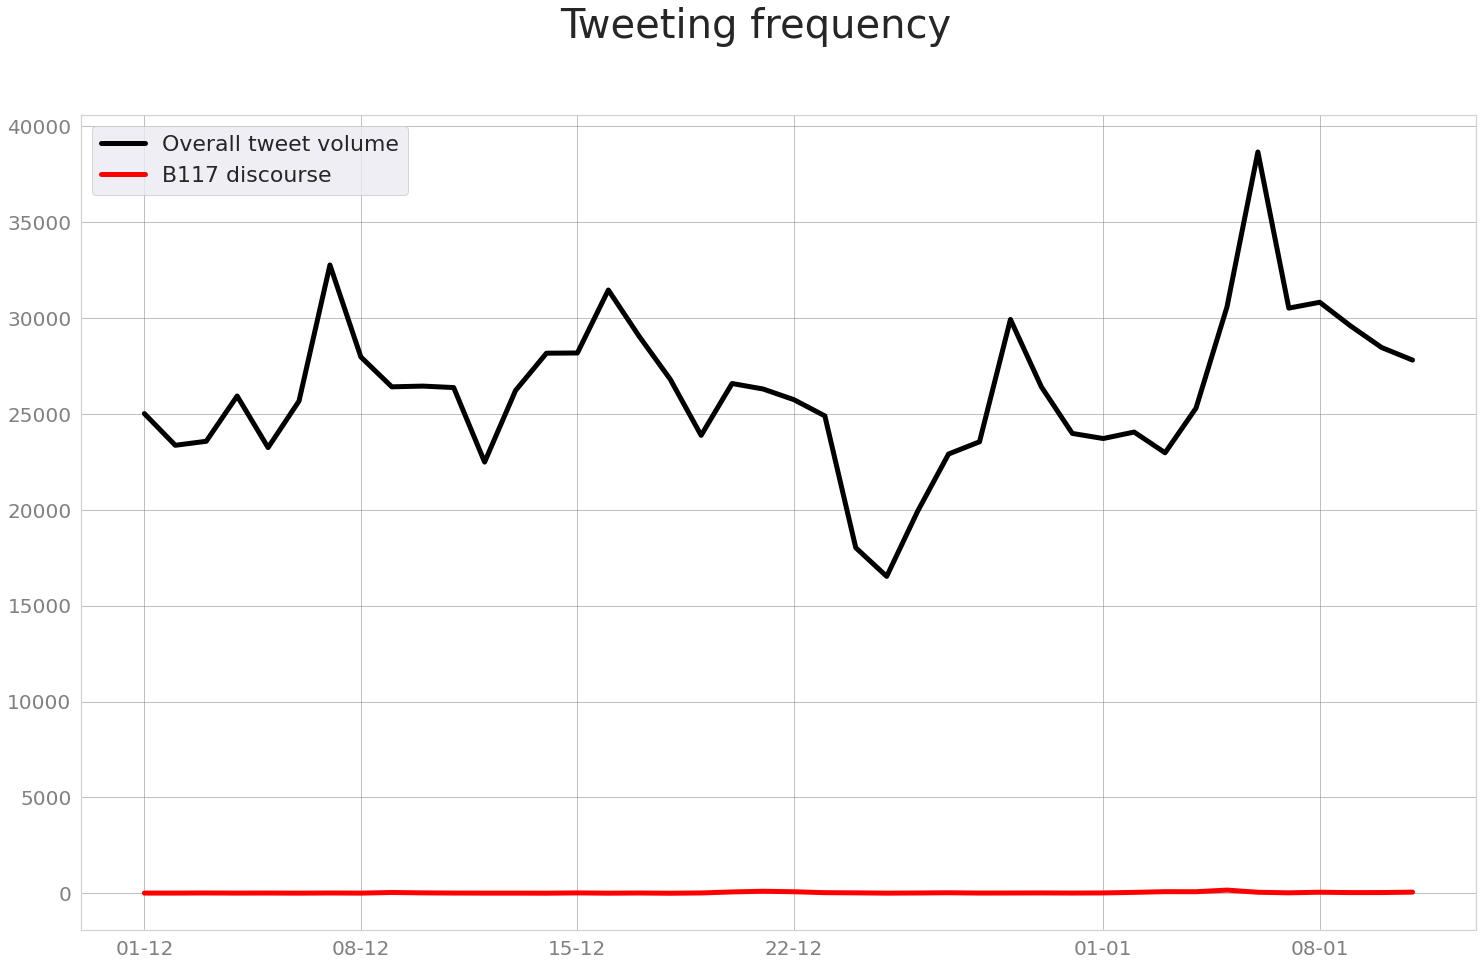

In [50]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)


fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.lineplot(x="date", y="nr_of_tweets", 
                   label = "Overall tweet volume",
                     linewidth = 5, data = data_freq_df)

ax1 = sns.lineplot(x="date", y="nr_of_tweets", 
                   label = "B117 discourse",
                   color = "red",
                     linewidth = 5, data = freq_df)


ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

    
fig.suptitle("Tweeting frequency", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()

plot_name = "fig/tweet_frequency_vs_b117_mentions.png"
fig.savefig(plot_name)

fig.show()

# Sentiment analysis

In [51]:
clean_df["date"] = pd.to_datetime(clean_df["date"])

# Rolling average
clean_df['compound_7day_ave'] = clean_df.compound.rolling(7).mean().shift(-3)

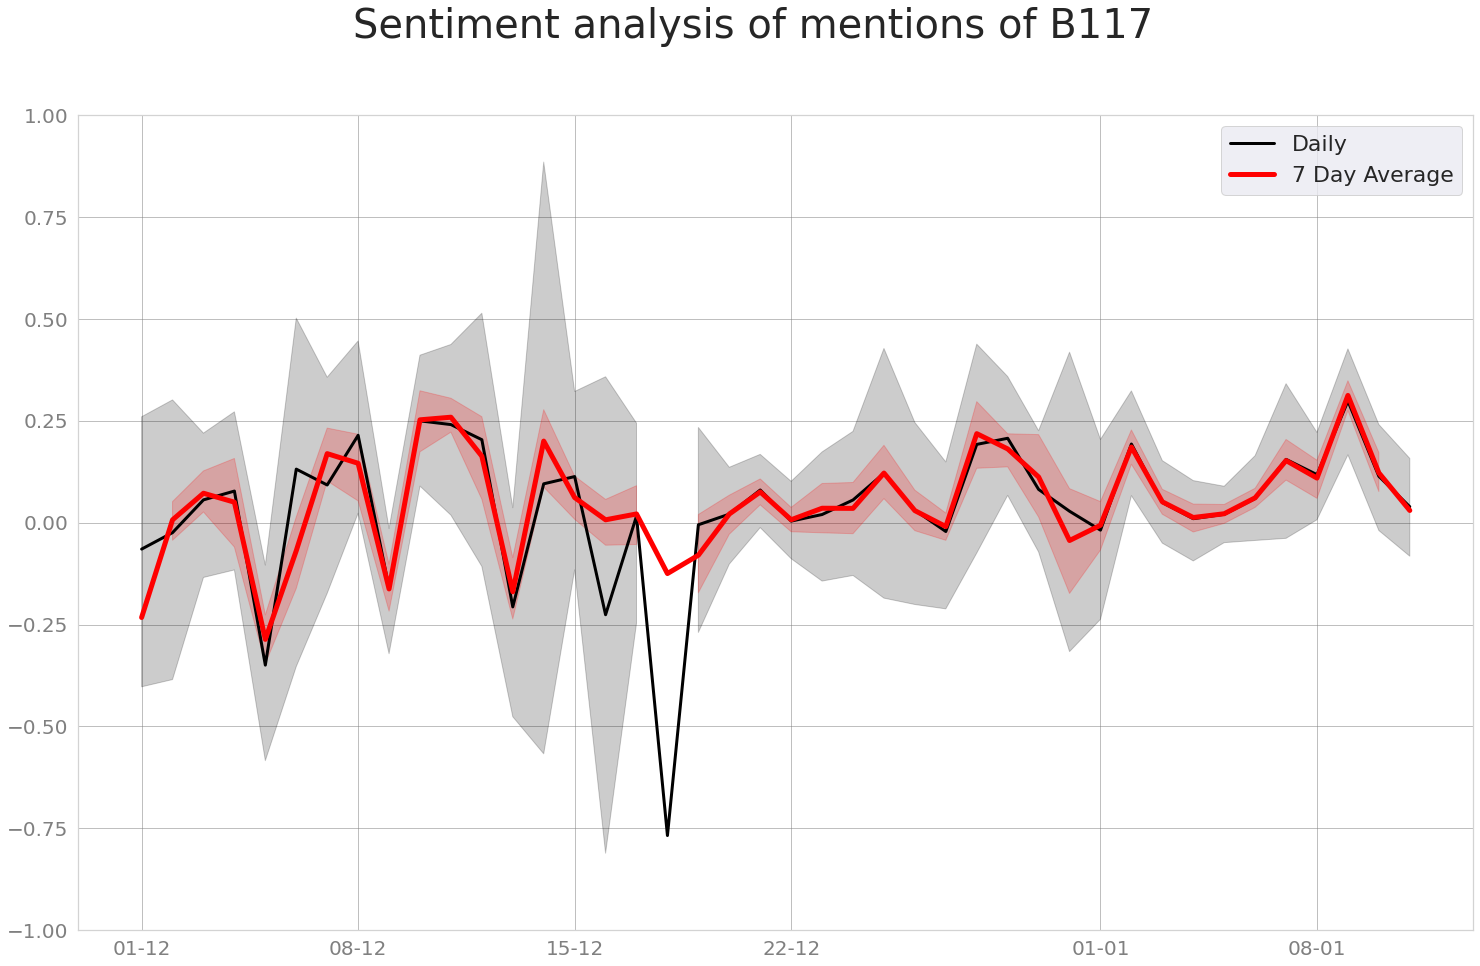

In [52]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)


fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.lineplot(x="date", y="compound", 
                   label="Daily",
                     linewidth = 3, data = clean_df)

ax1 = sns.lineplot(x="date", y="compound_7day_ave", 
                   label="7 Day Average", color = "red",
                     linewidth = 5, data = clean_df)


ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

    
fig.suptitle("Sentiment analysis of mentions of B117", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()
ax1.set(ylim=(-1, 1))

plot_name = "fig/sentiment_compound.png"
fig.savefig(plot_name)

fig.show()

# Word Frequency

In [53]:
texts = clean_df["mentioneless_text"].to_list()

In [54]:
import string

texts = ", ".join(texts)
texts = texts.translate(str.maketrans('', '', string.punctuation))
texts = texts.lower()

In [55]:
wordlist = texts.split()

wordfreq = []
for w in wordlist:
    wordfreq.append(wordlist.count(w))

In [56]:
word_freq = pd.DataFrame(data = list(zip(wordlist, wordfreq))).drop_duplicates().reset_index(drop = True).rename(columns={0:"word", 1:"Frequency"})

In [57]:
word_freq

,word,Frequency
0,minkskandale,1
1,eller,95
2,ej,9
3,smittetryk,2
4,mutation,489
...,...,...
6233,hverken,1
6234,præcise,1
6235,kernen,1
6236,tilskrives,1


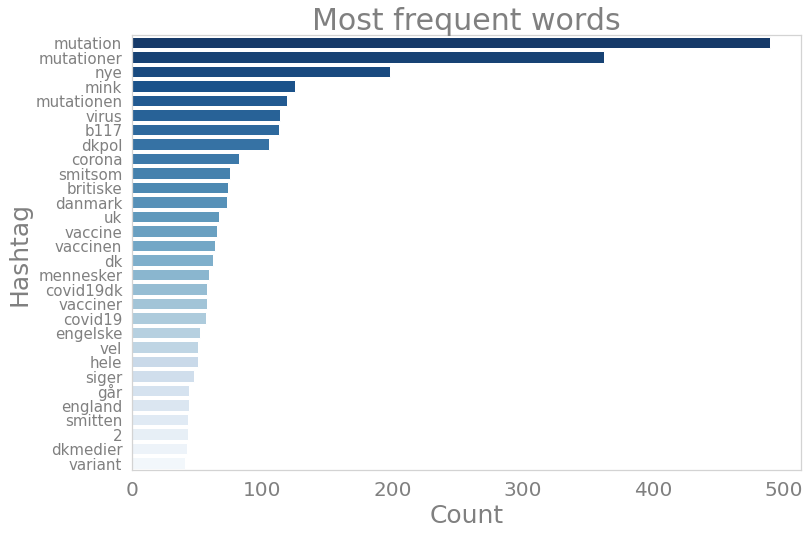

In [58]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes

file = open("stop_words.txt","r+")
stop_words = file.read().split()

word_freq = word_freq[~word_freq["word"].isin(stop_words)]
df0 = word_freq.nlargest(30, columns=['Frequency'])
nr_hash = len(df0["word"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
palette = sns.color_palette("Blues_r", nr_hash)

ax = sns.barplot(y="word", x="Frequency", palette = palette, data = df0)

ax.set(xlabel="Count", ylabel = "Hashtag")
ax.xaxis.get_label().set_fontsize(25)
ax.yaxis.get_label().set_fontsize(25)
ax.axes.set_title("Most frequent words",fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=15)

plot_name = "fig/word_frequency.png"
fig.savefig(plot_name)

In [59]:
word_freq[~word_freq["word"].isin(stop_words)]

,word,Frequency
0,minkskandale,1
3,smittetryk,2
4,mutation,489
7,udfordret,3
8,befolkningens,2
...,...,...
6233,hverken,1
6234,præcise,1
6235,kernen,1
6236,tilskrives,1


In [60]:
word_freq

,word,Frequency
0,minkskandale,1
3,smittetryk,2
4,mutation,489
7,udfordret,3
8,befolkningens,2
...,...,...
6233,hverken,1
6234,præcise,1
6235,kernen,1
6236,tilskrives,1
